# Feature Selection

In [7]:
# import the needed libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [10]:
# loading the cleaned Data from 01_data_preprocessing
X = pd.read_csv('cleaned_X.csv')
y = pd.read_csv('clean_y.csv')

In [11]:


# Split the dataset to train and test datasets
# Test size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scalling X 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Feature Importances using Random Forest 

c:\Users\Mena\miniconda3\envs\data_env\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


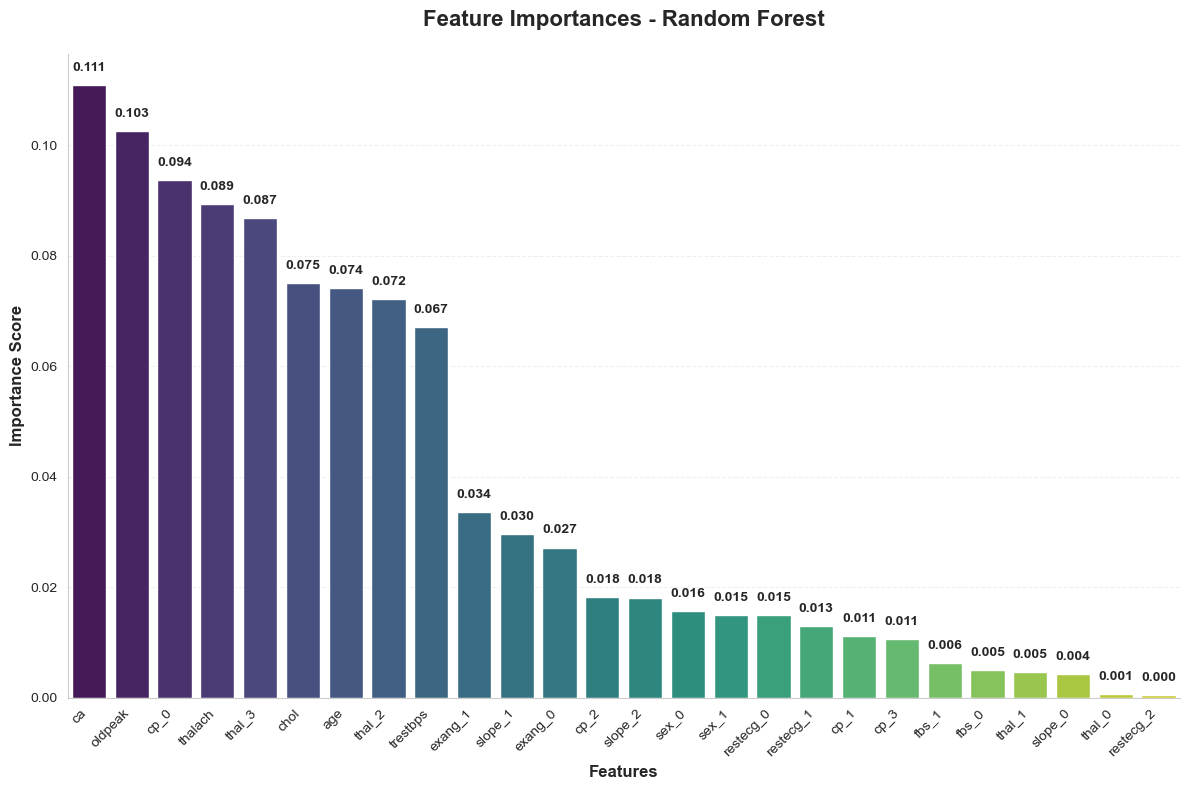

In [12]:

from sklearn.ensemble import RandomForestClassifier

# Create and train Random Forest Model 
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)


# Plot Features Importances  
# Set seaborn style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Get feature importances and create DataFrame for easier handling
importances_rf = rf_model.feature_importances_
feature_names = X.columns.tolist()

# Create a DataFrame and sort by importance (descending)
importance_rf = pd.DataFrame({
    'feature': feature_names,
    'importance': importances_rf
}).sort_values('importance', ascending=False)

# Create the plot
plt.figure(figsize=(12, 8))

# Create vertical bar plot with seaborn color palette
ax = sns.barplot(data=importance_rf, x='feature', y='importance', 
                 palette='viridis', hue='feature', legend=False)

# Customize the plot
plt.title('Feature Importances - Random Forest', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Importance Score', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for i, (bar, importance) in enumerate(zip(ax.patches, importance_rf['importance'])):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, 
            f'{importance:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Customize grid
plt.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Remove top and right spines
sns.despine()

# Adjust layout
plt.tight_layout()
plt.show()

## Feature Importances using Gradien Boosting 

c:\Users\Mena\miniconda3\envs\data_env\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


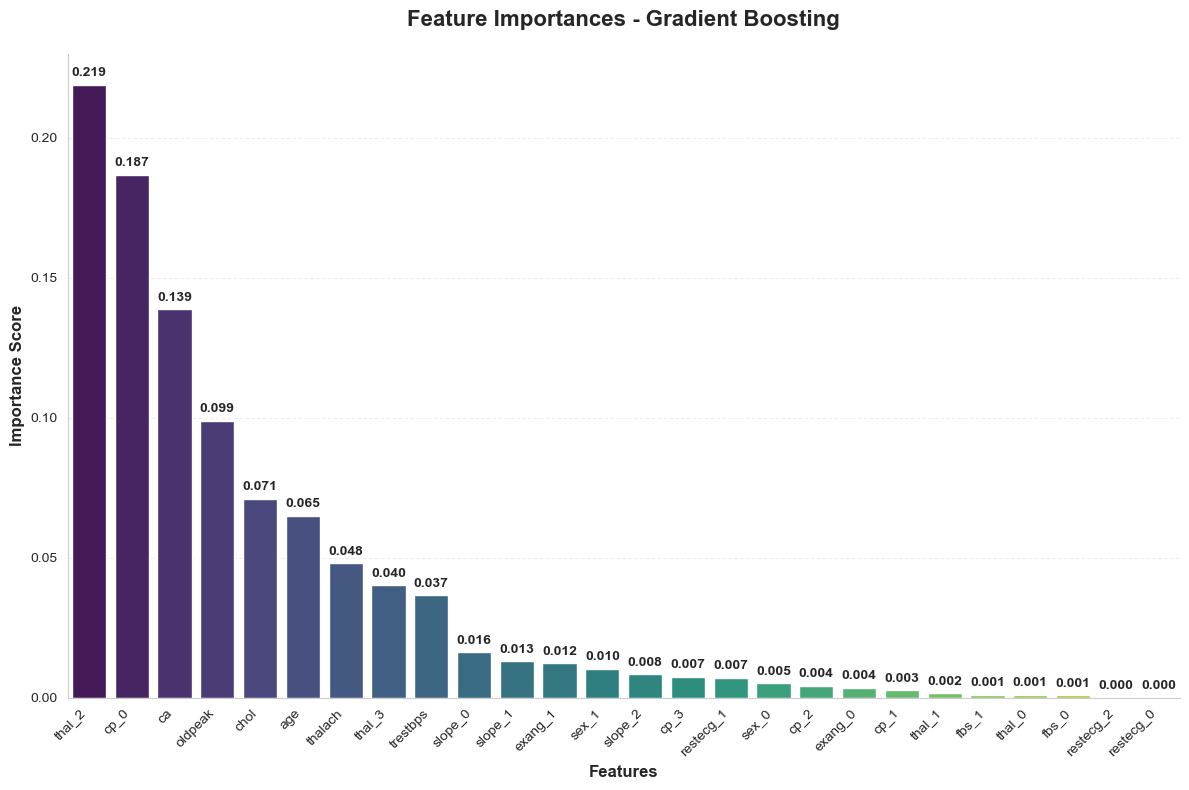

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train Gradien Boosting Model 
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Plot Features importances
# Set seaborn style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Get feature importances and create DataFrame for easier handling
importances_gb = gb_model.feature_importances_
feature_names = X.columns.tolist()

# Create a DataFrame and sort by importance (descending)
importance_gb = pd.DataFrame({
    'feature': feature_names,
    'importance': importances_gb
}).sort_values('importance', ascending=False)

# Create the plot
plt.figure(figsize=(12, 8))

# Create vertical bar plot with seaborn color palette
ax = sns.barplot(data=importance_gb, x='feature', y='importance', 
                 palette='viridis', hue='feature', legend=False)

# Customize the plot
plt.title('Feature Importances - Gradient Boosting', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Importance Score', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for i, (bar, importance) in enumerate(zip(ax.patches, importance_gb['importance'])):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, 
            f'{importance:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# Customize grid
plt.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Remove top and right spines
sns.despine()

# Adjust layout
plt.tight_layout()
plt.show()


## Chi-Square Method 

In [14]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply Chi-square feature selection 
chi2_selector = SelectKBest(chi2, k='all')
X_new = chi2_selector.fit_transform(X, y)

# Get the scores for each feature
feature_scores = chi2_selector.scores_

# Create a DataFrame to view the feature scores 
features_scores_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Square Score': feature_scores
})

# Sort features based on Chi-square score
feature_scores_df = features_scores_df.sort_values(by='Chi-Square Score', ascending=False)

feature_scores_df

,Feature,Chi-Square Score
3,thalach,650.008493
4,oldpeak,253.653461
5,ca,210.625919
8,cp_0,142.563300
25,thal_3,141.524151
21,exang_1,130.470927
24,thal_2,129.833983
2,chol,110.723364
17,slope_2,84.195255
0,age,81.425368
